In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.metrics import mutual_info_score
import scipy.stats as ss
from scipy.stats import chi2_contingency
from itertools import combinations

In [2]:
#Load dataframe
data=pd.read_csv("vehicles_red.csv")

# Configuración que permite mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Visualizar las primeras filas del dataset omitiendo las filas que tienen más de un NaN
data.dropna(thresh=data.shape[1] - 1).head(5)

id      region   price    year manufacturer              model  \
126  7305672709      auburn     0.0  2018.0    chevrolet  express cargo van   
127  7305672266      auburn     0.0  2019.0    chevrolet  express cargo van   
128  7305672252      auburn     0.0  2018.0    chevrolet  express cargo van   
215  7316482063  birmingham  4000.0  2002.0       toyota               echo   
219  7316429417  birmingham  2500.0  1995.0          bmw               525i   

     condition    cylinders fuel  odometer title_status transmission  \
126   like new  6 cylinders  gas   68472.0        clean    automatic   
127   like new  6 cylinders  gas   69125.0        clean    automatic   
128   like new  6 cylinders  gas   66555.0        clean    automatic   
215  excellent  4 cylinders  gas  155000.0        clean    automatic   
219       fair  6 cylinders  gas  110661.0        clean    automatic   

                   VIN drive       size   type paint_color  county state  \
126  1GCWGAFP8J1309579   rwd  full-size    van       white     NaN    al   
127  1GCWGAFP4K1214373   rwd  full-size    van       white     NaN    al   
128  1GCWGAFPXJ1337903   rwd  full-size    van       white     NaN    al   
215  JTDBT123520243495   fwd    compact  sedan        blue     NaN    al   
219  WBAHD6322SGK86772   rwd   mid-size  sedan       white     NaN    al   

           lat       long              posting_date  
126  31.425091 -85.617723  2021-04-12T11:20:35-0500  
127  31.425091 -85.617723  2021-04-12T11:20:00-0500  
128  31.425091 -85.617723  2021-04-12T11:19:58-0500  
215  33.913500 -84.685900  2021-05-03T17:48:17-0500  
219  33.353800 -86.825400  2021-05-03T16:03:27-0500

# Information about columns

**Information about columns**

- **id**: Unique identifier number for the record. Each record refers to a vehicle, and its ID is unique across the entire dataset.  
- **region**: U.S. region where the vehicle is being sold.  
- **price**: Sale price (our target variable).  
- **year**: Year the vehicle was manufactured.  
- **manufacturer**: Manufacturer.  
- **model**: Model.  
- **condition**: Condition of the vehicle.  
- **cylinders**: Number of engine cylinders.  
- **fuel**: Type of fuel the vehicle uses.  
- **odometer**: Vehicle mileage since manufacture.  
- **title_status**: Legal status of the vehicle.  
- **transmission**: Type of transmission the vehicle uses.  
- **VIN**: Vehicle Identification Number.  
- **drive**: Type of drivetrain.  
- **size**: Size.  
- **type**: Body type.  
- **paint_color**: Vehicle's paint color.  
- **state**: U.S. state where the vehicle is being sold.  
- **lat**: GPS latitude coordinate.  
- **long**: GPS longitude coordinate.  
- **posting_date**: Date and time the sales listing was posted in the last 30 days.  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  county        0 non-null       float64
 18  stat

We have a total of **22 variables** (including the target variable **price**) and a total of **426,880 records**. This is a considerable volume for conducting a thorough analysis.

Regarding data types, we see that almost all variables are categorical (or at least Python automatically categorizes them as such based on their data type), except...
- **id**  
- **price**  
- **year**  
- **odometer**  
- **county**  
- **lat**  
- **long**

## Table of null values

In [ ]:
# Tabla de porcentaje de registros con Missing Values por cada variable
missing_percentages = data.isnull().mean() * 100

# Contar el número de valores nulos por cada variable
missing_counts = data.isnull().sum()

# Crear una tabla de resultados
missing_values_table = pd.DataFrame({
    'Variable': data.columns,
    'Porcentaje de Missing Values': missing_percentages ,
    'Numero de Nulos': missing_counts
})

# Ordenar por el porcentaje de Missing Values de mayor a menor
missing_values_table = missing_values_table.sort_values(by='Porcentaje de Missing Values', ascending=False)

# Mostrar la tabla
print(missing_values_table.to_string(index=False))

    Variable  Porcentaje de Missing Values  Numero de Nulos
      county                    100.000000           426880
        size                     71.767476           306361
   cylinders                     41.622470           177678
   condition                     40.785232           174104
         VIN                     37.725356           161042
       drive                     30.586347           130567
 paint_color                     30.501078           130203
        type                     21.752717            92858
manufacturer                      4.133714            17646
title_status                      1.930753             8242
        long                      1.534155             6549
         lat                      1.534155             6549
       model                      1.236179             5277
    odometer                      1.030735             4400
        fuel                      0.705819             3013
transmission                      0.5987

## General stats

In [ ]:
data.describe(include="all")

id    region         price           year manufacturer  \
count   4.268800e+05    426880  4.268800e+05  425675.000000       409234   
unique           NaN       404           NaN            NaN           42   
top              NaN  columbus           NaN            NaN         ford   
freq             NaN      3608           NaN            NaN        70985   
mean    7.311487e+09       NaN  7.519903e+04    2011.235191          NaN   
std     4.473170e+06       NaN  1.218228e+07       9.452120          NaN   
min     7.207408e+09       NaN  0.000000e+00    1900.000000          NaN   
25%     7.308143e+09       NaN  5.900000e+03    2008.000000          NaN   
50%     7.312621e+09       NaN  1.395000e+04    2013.000000          NaN   
75%     7.315254e+09       NaN  2.648575e+04    2017.000000          NaN   
max     7.317101e+09       NaN  3.736929e+09    2022.000000          NaN   

         model condition    cylinders    fuel      odometer title_status  \
count   421603    252776       249202  423867  4.224800e+05       418638   
unique   29667         6            8       5           NaN            6   
top      f-150      good  6 cylinders     gas           NaN        clean   
freq      8009    121456        94169  356209           NaN       405117   
mean       NaN       NaN          NaN     NaN  9.804333e+04          NaN   
std        NaN       NaN          NaN     NaN  2.138815e+05          NaN   
min        NaN       NaN          NaN     NaN  0.000000e+00          NaN   
25%        NaN       NaN          NaN     NaN  3.770400e+04          NaN   
50%        NaN       NaN          NaN     NaN  8.554800e+04          NaN   
75%        NaN       NaN          NaN     NaN  1.335425e+05          NaN   
max        NaN       NaN          NaN     NaN  1.000000e+07          NaN   

       transmission                VIN   drive       size    type paint_color  \
count        424324             265838  296313     120519  334022      296677   
unique            3             118264       3          4      13          12   
top       automatic  1FMJU1JT1HEA52352     4wd  full-size   sedan       white   
freq         336524                261  131904      63465   87056       79285   
mean            NaN                NaN     NaN        NaN     NaN         NaN   
std             NaN                NaN     NaN        NaN     NaN         NaN   
min             NaN                NaN     NaN        NaN     NaN         NaN   
25%             NaN                NaN     NaN        NaN     NaN         NaN   
50%             NaN                NaN     NaN        NaN     NaN         NaN   
75%             NaN                NaN     NaN        NaN     NaN         NaN   
max             NaN                NaN     NaN        NaN     NaN         NaN   

        county   state            lat           long              posting_date  
count      0.0  426880  420331.000000  420331.000000                    426812  
unique     NaN      51            NaN            NaN                    381536  
top        NaN      ca            NaN            NaN  2021-04-23T22:13:05-0400  
freq       NaN   50614            NaN            NaN                        12  
mean       NaN     NaN      38.493940     -94.748599                       NaN  
std        NaN     NaN       5.841533      18.365462                       NaN  
min        NaN     NaN     -84.122245    -159.827728                       NaN  
25%        NaN     NaN      34.601900    -111.939847                       NaN  
50%        NaN     NaN      39.150100     -88.432600                       NaN  
75%        NaN     NaN      42.398900     -80.832039                       NaN  
max        NaN     NaN      82.390818     173.885502                       NaN

In [ ]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from IPython.display import display

# Agrupar los datos por región
region_info = data.groupby('region').agg(
    cantidad_vehiculos=('region', 'size'),
    precio_promedio=('price', 'mean'),
    antigüedad_promedio=('year', 'mean'),
    marcas=('manufacturer', lambda x: ', '.join(x.dropna().astype(str).unique()))
).reset_index()

# Crear una copia de tu DataFrame para no modificar el original
data_copy = data.copy()

# Eliminar espacios en los nombres de las columnas (si los hubiera)
data_copy.columns = data_copy.columns.str.strip()

# Crear el mapa base (ajustar la ubicación inicial y el nivel de zoom)
m = folium.Map(location=[20.0, -50.0], zoom_start=6)

# Crear el Cluster de Marcadores
marker_cluster = MarkerCluster().add_to(m)

# Iterar sobre las regiones en el DataFrame original para obtener las coordenadas
for _, row in region_info.iterrows():
    # Filtrar el DataFrame original para obtener la fila con las coordenadas para esta región
    region_data = data_copy[data_copy['region'] == row['region']].dropna(subset=['lat', 'long'])

    if not region_data.empty:
        # Tomar la primera fila con coordenadas no nulas
        lat = region_data.iloc[0]['lat']
        lon = region_data.iloc[0]['long']

        # Crear el popup con la información agregada
        popup_text = f"""
        <b>Región:</b> {row['region']}<br>
        <b>Cantidad de Vehículos:</b> {row['cantidad_vehiculos']}<br>
        <b>Precio Promedio:</b> ${row['precio_promedio']:.2f}<br>
        <b>Antigüedad Promedio:</b> {2025 - row['antigüedad_promedio']:.1f} años<br>
        <b>Marcas:</b> {row['marcas']}
        """

        # Crear el marcador con las coordenadas obtenidas
        folium.Marker(
            location=[lat, lon],
            popup=popup_text,
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(marker_cluster)

# Mostrar el mapa
display(m)


# Categorical Variable Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  county        0 non-null       float64
 18  stat

In [ ]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con la información agregada por región
region_info = data.groupby('region').agg(
    cantidad_vehiculos=('region', 'size'),
    precio_promedio=('price', 'mean'),
    antigüedad_promedio=('year', 'mean')
).reset_index()

# Crear el Treemap
fig = px.treemap(region_info,
                 path=['region'],  # Aquí defines la jerarquía, en este caso solo por región
                 values='cantidad_vehiculos',  # Tamaño del bloque por cantidad de vehículos
                 color='precio_promedio',  # Color por precio promedio
                 hover_data={'region': True, 'cantidad_vehiculos': True, 'precio_promedio': True, 'antigüedad_promedio': True},  # Datos al pasar el mouse
                 color_continuous_scale='Viridis',  # Escala de color para el precio
                 title='Vehicle Treemap by Region')

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con la información agregada por marca
marca_info = data.groupby('manufacturer').agg(
    cantidad_vehiculos=('manufacturer', 'size'),
    precio_promedio=('price', 'mean')
).reset_index()

# Crear el Treemap
fig = px.treemap(marca_info,
                 path=['manufacturer'],  # Jerarquía solo por marca
                 values='cantidad_vehiculos',  # Tamaño del bloque por cantidad de vehículos
                 color='precio_promedio',  # Color por precio promedio
                 hover_data={'manufacturer': True, 'cantidad_vehiculos': True, 'precio_promedio': True},  # Datos al pasar el mouse
                 color_continuous_scale='Viridis',  # Escala de color para el precio
                 title='Vehicle Treemap by Brand and Average Price')

# Mostrar el gráfico
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Agrupar la información por marca
marca_info = data.groupby('model').agg(
    cantidad_vehiculos=('model', 'size'),
    precio_promedio=('price', 'mean')
).reset_index()

# Seleccionar las 100 marcas con más vehículos
top_100_marca = marca_info.nlargest(100, 'cantidad_vehiculos')

# Crear el Treemap
fig = px.treemap(top_100_marca,
                 path=['model'],  # Jerarquía solo por marca
                 values='cantidad_vehiculos',  # Tamaño del bloque por cantidad de vehículos
                 color='precio_promedio',  # Color por precio promedio
                 hover_data={'model': True, 'cantidad_vehiculos': True, 'precio_promedio': True},  # Datos al pasar el mouse
                 color_continuous_scale='Viridis',  # Escala de color para el precio
                 title='Treemap de Vehículos por Marca y Precio Promedio')

# Mostrar el gráfico
fig.show()



In [ ]:
import plotly.express as px
import pandas as pd

# Lista de columnas para las cuales generaremos el Treemap
columnas = ['condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmissio', 'drive', 'size', 'type', 'paint_color']

# Crear un Treemap para cada una de las columnas en la lista
for columna in columnas:
    # Agrupar por la columna y calcular la cantidad de vehículos y el precio promedio
    treemap_info = data.groupby(columna).agg(
        cantidad_vehiculos=(columna, 'size'),
        precio_promedio=('price', 'mean')
    ).reset_index()

    # Crear el Treemap
    fig = px.treemap(treemap_info,
                     path=[columna],  # Jerarquía solo por la columna actual
                     values='cantidad_vehiculos',  # Tamaño del bloque por cantidad de vehículos
                     color='precio_promedio',  # Color por precio promedio
                     hover_data={columna: True, 'cantidad_vehiculos': True, 'precio_promedio': True},  # Datos al pasar el mouse
                     color_continuous_scale='Viridis',  # Escala de color para el precio
                     title=f'Treemap de Vehículos por {columna.capitalize()}')

    # Mostrar el gráfico
    fig.show()


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72813 entries, 0 to 72812
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            72813 non-null  int64  
 1   region        72813 non-null  object 
 2   price         72812 non-null  float64
 3   year          72535 non-null  float64
 4   manufacturer  69794 non-null  object 
 5   model         71868 non-null  object 
 6   condition     46098 non-null  object 
 7   cylinders     43797 non-null  object 
 8   fuel          72561 non-null  object 
 9   odometer      71515 non-null  float64
 10  title_status  70851 non-null  object 
 11  transmission  72488 non-null  object 
 12  VIN           47008 non-null  object 
 13  drive         50439 non-null  object 
 14  size          19493 non-null  object 
 15  type          58379 non-null  object 
 16  paint_color   50057 non-null  object 
 17  county        0 non-null      float64
 18  state         72812 non-nu

# Numerical Variable Analysis

In [6]:
data.describe()

id         price          year      odometer  county  \
count  7.281300e+04  7.281200e+04  72535.000000  7.151500e+04     0.0   
mean   7.312174e+09  1.045399e+05   2011.069139  9.553354e+04     NaN   
std    4.705552e+06  1.310846e+07     10.243856  2.549107e+05     NaN   
min    7.208550e+09  0.000000e+00   1900.000000  0.000000e+00     NaN   
25%    7.309278e+09  6.000000e+03   2008.000000  3.500000e+04     NaN   
50%    7.313789e+09  1.400000e+04   2014.000000  7.963000e+04     NaN   
75%    7.315850e+09  2.599600e+04   2017.000000  1.270000e+05     NaN   
max    7.316935e+09  3.009549e+09   2022.000000  1.000000e+07     NaN   

                lat          long  
count  72602.000000  72602.000000  
mean      36.941946   -114.791324  
std        6.121994     14.194690  
min      -84.122245   -158.599600  
25%       33.779214   -121.364800  
50%       35.246801   -118.404820  
75%       38.576200   -111.926100  
max       82.390818    173.885502

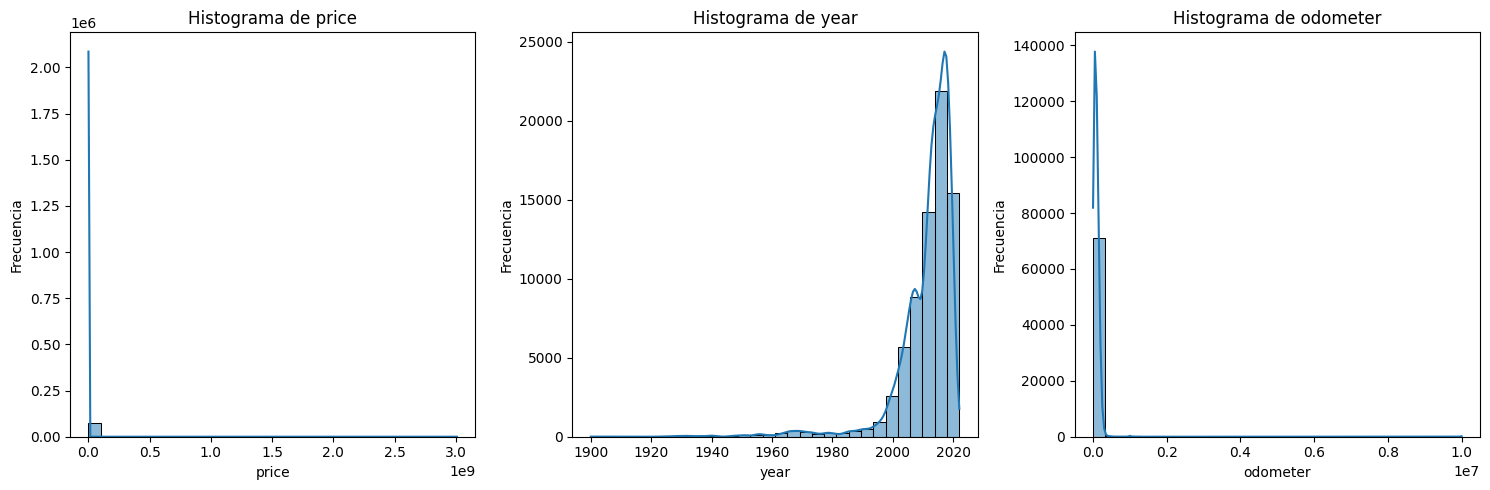

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas a graficar
columns = ['price', 'year', 'odometer']

# Crear los histogramas
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


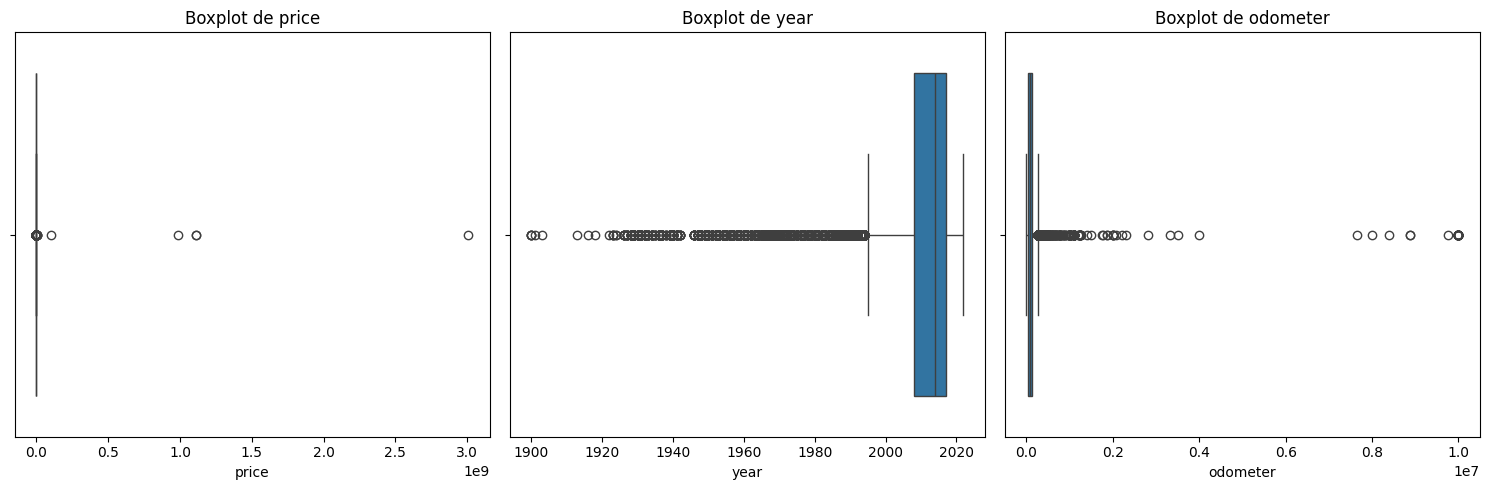

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas a graficar
columns = ['price', 'year', 'odometer']

# Crear los boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [7]:
import plotly.express as px
import pandas as pd

# Definir las columnas a graficar
columns = ['price', 'year', 'odometer']

# Crear un boxplot interactivo
fig = px.box(data, y=columns, title="Boxplot Interactivo")

# Mostrar la figura
fig.show()


In [24]:
import pandas as pd
import numpy as np

def detectar_outliers(data, columnas, threshold=3):
    outliers_dict = {}  # Diccionario para almacenar los outliers

    for columna in columnas:
        if columna in data.columns:
            # Calcular media y desviación estándar
            mean = data[columna].mean()
            std = data[columna].std()

            # Calcular Z-score
            z_scores = (data[columna] - mean) / std

            # Filtrar outliers
            outliers = data[np.abs(z_scores) > threshold]

            # Guardar los outliers en el diccionario
            outliers_dict[columna] = outliers[[columna]]
        else:
            print(f"La columna '{columna}' no existe en el DataFrame.")

    return outliers_dict

# Definir las columnas a analizar
columnas_a_analizar = ['price', 'year', 'odometer']

# Obtener outliers de todas las columnas
outliers_detectados_z = detectar_outliers(data, columnas_a_analizar)

# Imprimir los outliers detectados por columna

print("Outliers with Z-score\n")
for columna, outliers in outliers_detectados_z.items():
    print(f"\nOutliers en {columna}:")
    print(outliers)


Outliers with Z-score


Outliers en price:
              price
280    9.876543e+08
1838   1.000000e+08
29386  1.111111e+09
37409  1.111111e+09
37410  3.009549e+09

Outliers en year:
         year
101    1968.0
137    1966.0
208    1976.0
210    1969.0
228    1978.0
...       ...
72639  1950.0
72641  1951.0
72695  1976.0
72696  1976.0
72697  1956.0

[1843 rows x 1 columns]

Outliers en odometer:
        odometer
280     999999.0
455    9999999.0
562    2222222.0
615    1111111.0
616    1111111.0
...          ...
71010  9999999.0
71856  1862563.0
72568  9999999.0
72799   983694.0
72802  1234567.0

[161 rows x 1 columns]


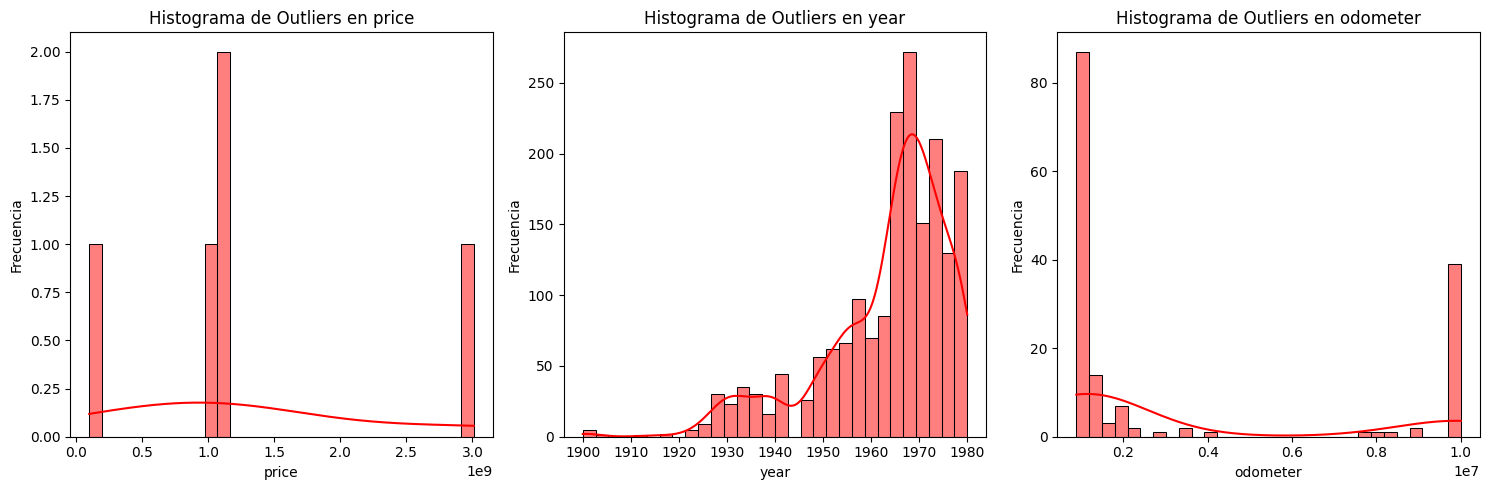

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_outliers(outliers_dict):
    plt.figure(figsize=(15, 5))

    for i, (columna, outliers) in enumerate(outliers_dict.items(), 1):
        if not outliers.empty:  # Verifica si hay outliers antes de graficar
            plt.subplot(1, 3, i)
            sns.histplot(outliers[columna], bins=30, kde=True, color='red')
            plt.title(f'Histograma de Outliers en {columna}')
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Graficar los histogramas de los outliers detectados
plot_histogram_outliers(outliers_detectados_z)


In [26]:
import pandas as pd
import numpy as np

def detectar_outliers_iqr(data, columnas, factor=1.5):
    outliers_dict = {}  # Diccionario para almacenar los outliers

    for columna in columnas:
        if columna in data.columns:
            # Calcular Q1 (percentil 25) y Q3 (percentil 75)
            Q1 = data[columna].quantile(0.25)
            Q3 = data[columna].quantile(0.75)

            # Calcular IQR
            IQR = Q3 - Q1

            # Definir los límites para detectar outliers
            limite_inferior = Q1 - (factor * IQR)
            limite_superior = Q3 + (factor * IQR)

            # Filtrar outliers
            outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

            # Guardar los outliers en el diccionario
            outliers_dict[columna] = outliers[[columna]]
        else:
            print(f"La columna '{columna}' no existe en el DataFrame.")

    return outliers_dict

# Definir las columnas a analizar
columnas_a_analizar = ['price', 'year', 'odometer']

# Obtener outliers de todas las columnas
outliers_detectados_i = detectar_outliers_iqr(data, columnas_a_analizar)

# Imprimir los outliers detectados por columna
print("Outliers with IQR\n")
for columna, outliers in outliers_detectados_i.items():
    print(f"\nOutliers en {columna}:")
    print(outliers)


Outliers with IQR


Outliers en price:
             price
204        58977.0
280    987654321.0
346        98900.0
365        72900.0
461        99950.0
...            ...
72701      68000.0
72726      68995.0
72742      74950.0
72765      69950.0
72782      60950.0

[1832 rows x 1 columns]

Outliers en year:
         year
37     1992.0
101    1968.0
137    1966.0
208    1976.0
210    1969.0
...       ...
72697  1956.0
72713  1985.0
72751  1994.0
72783  1991.0
72787  1994.0

[3136 rows x 1 columns]

Outliers en odometer:
        odometer
138     281000.0
280     999999.0
315     266000.0
336     273000.0
411     279000.0
...          ...
72568  9999999.0
72592   270000.0
72599   310000.0
72799   983694.0
72802  1234567.0

[913 rows x 1 columns]


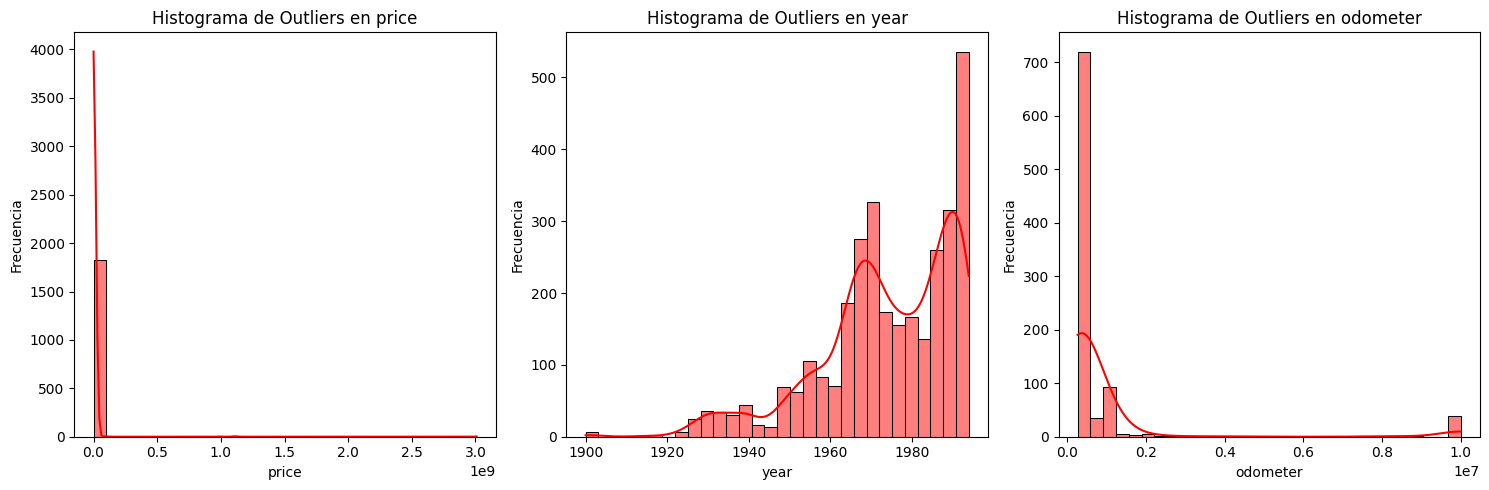

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_outliers(outliers_dict):
    plt.figure(figsize=(15, 5))

    for i, (columna, outliers) in enumerate(outliers_dict.items(), 1):
        if not outliers.empty:  # Verifica si hay outliers antes de graficar
            plt.subplot(1, 3, i)
            sns.histplot(outliers[columna], bins=30, kde=True, color='red')
            plt.title(f'Histograma de Outliers en {columna}')
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Graficar los histogramas de los outliers detectados con IQR
plot_histogram_outliers(outliers_detectados_i)


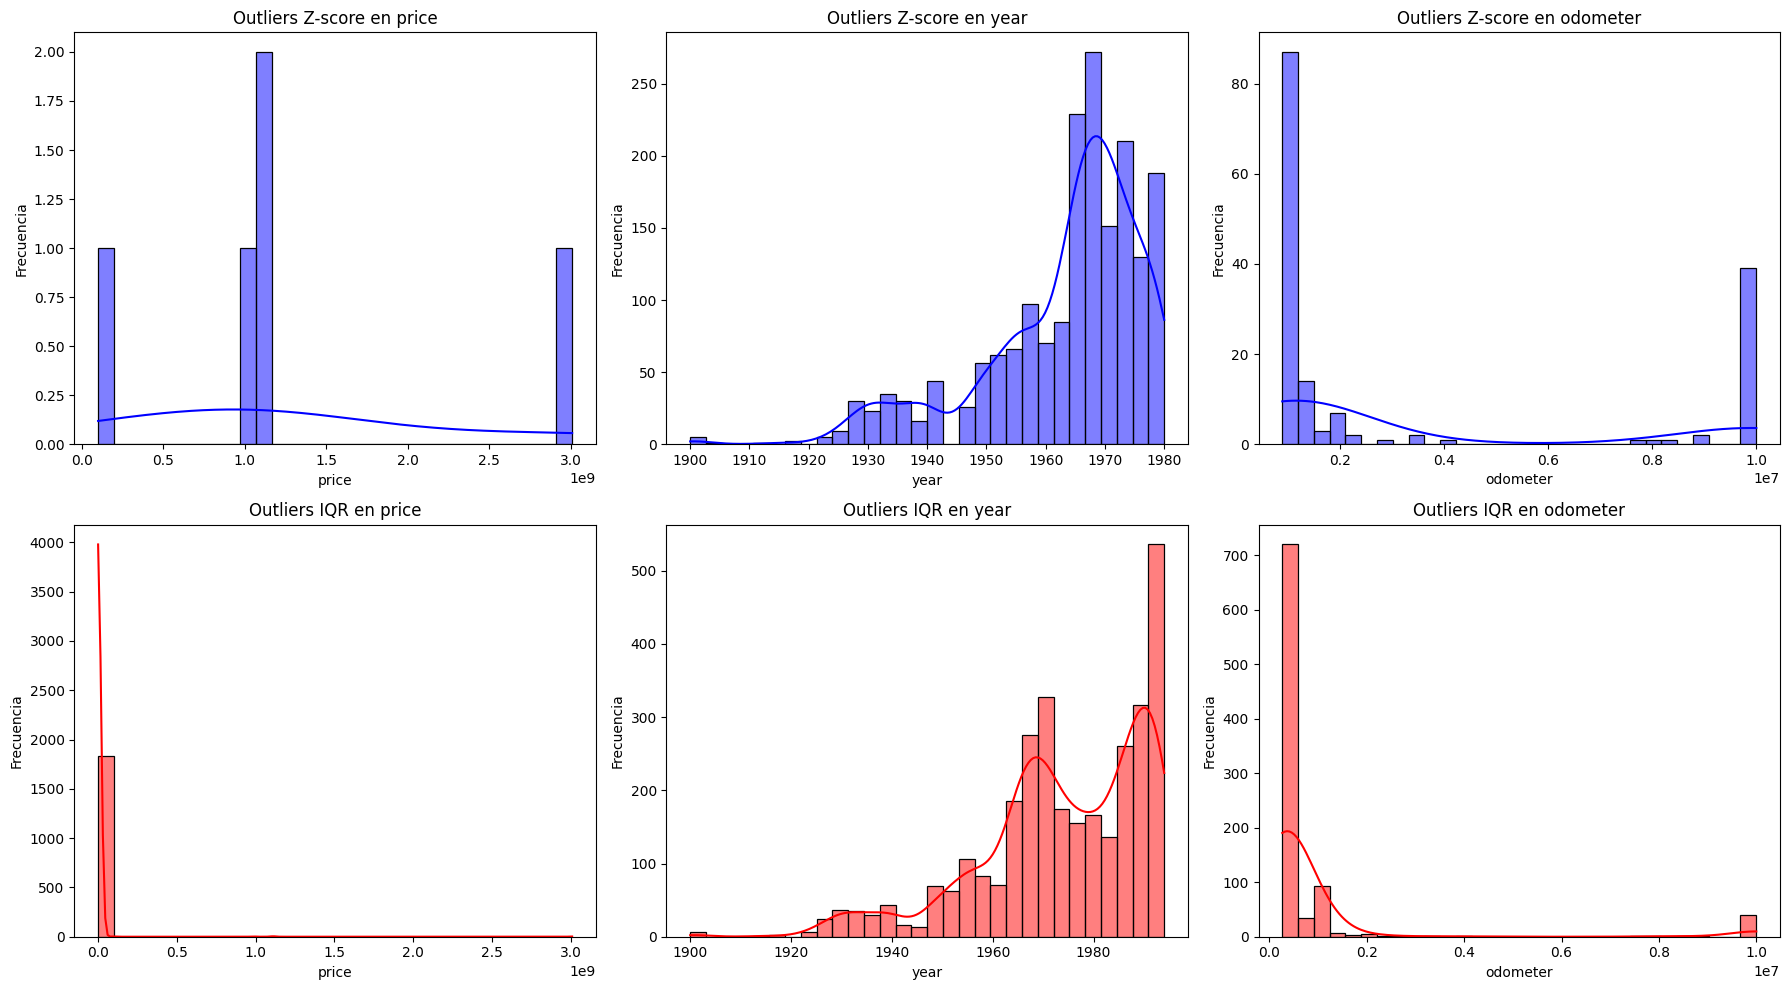

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar los histogramas combinados de outliers Z-score e IQR
def plot_histograms_combined(outliers_zscore, outliers_iqr):
    plt.figure(figsize=(18, 10))

    # Graficar histogramas de outliers con Z-score
    for i, (columna, outliers) in enumerate(outliers_zscore.items(), 1):
        if not outliers.empty:
            plt.subplot(2, 3, i)
            sns.histplot(outliers[columna], bins=30, kde=True, color='blue')
            plt.title(f'Outliers Z-score en {columna}')
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')

    # Graficar histogramas de outliers con IQR
    for i, (columna, outliers) in enumerate(outliers_iqr.items(), 1):
        if not outliers.empty:
            plt.subplot(2, 3, i + 3)  # Poner en la segunda fila
            sns.histplot(outliers[columna], bins=30, kde=True, color='red')
            plt.title(f'Outliers IQR en {columna}')
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Graficar los histogramas combinados
plot_histograms_combined(outliers_detectados_z, outliers_detectados_i)
